# MOVIE RECOMMENDATION USING COLLABORATIVE FILTERING

In [7]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
##Dataset url: https://grouplens.org/datasets/movielens/latest/

# reading the csv files
movies = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [9]:
movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [10]:
rating

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [39]:
#movies[movies['movieId'] == 436]['title']

In [11]:
# merging two dataframe on movieId column
df = pd.merge(rating,movies,on='movieId')
df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [12]:
# dropping the nal rows
df.dropna(inplace=True)

In [13]:
#df['title'] = df['title'].str[:-6]

In [14]:
# creating a dataframe using a movie name and number of times the movies has been rated 
coun = pd.DataFrame(df.title.value_counts().reset_index().values, columns=["title", "count_ratings"])
count = coun.sort_index(axis = 0, ascending=True)
count

,title,count_ratings
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,"Sex, Drugs & Taxation (2013)",1
9715,Extraordinary Tales (2015),1
9716,Tomorrow (2015),1
9717,Embrace of the Serpent (2016),1


In [15]:
# combining the dataframe and filtering the movies which has been rated by minimum 50 users 
df_combined = df.merge(count, left_on = 'title', right_on = 'title', how = 'left')

df_combined = df_combined[df_combined['count_ratings'] > 50] #threshold minimum ratings
df_combined

,userId,movieId,rating,title,count_ratings
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
79246,603,1997,4.0,"Exorcist, The (1973)",53
79247,606,1997,3.0,"Exorcist, The (1973)",53
79248,607,1997,5.0,"Exorcist, The (1973)",53
79249,608,1997,4.5,"Exorcist, The (1973)",53


In [16]:
# creating a list of unique titles
l = df.title.unique()

In [17]:
# filtering the movies title with proper name as it will be used in final recommendation for searching the movies
for i in l:
   (i.replace(r"\(.*\)",""))
   print (i[:-6])

Toy Story 
Grumpier Old Men 
Heat 
Seven (a.k.a. Se7en) 
Usual Suspects, The 
From Dusk Till Dawn 
Bottle Rocket 
Braveheart 
Rob Roy 
Canadian Bacon 
Desperado 
Billy Madison 
Clerks 
Dumb & Dumber (Dumb and Dumber) 
Ed Wood 
Star Wars: Episode IV - A New Hope 
Pulp Fiction 
Stargate 
Tommy Boy 
Clear and Present Danger 
Forrest Gump 
Jungle Book, The 
Mask, The 
Blown Away 
Dazed and Confused 
Fugitive, The 
Jurassic Park 
Mrs. Doubtfire 
Schindler's List 
So I Married an Axe Murderer 
Three Musketeers, The 
Tombstone 
Dances with Wolves 
Batman 
Silence of the Lambs, The 
Pinocchio 
Fargo 
Mission: Impossible 
James and the Giant Peach 
Space Jam 
Rock, The 
Twister 
Independence Day (a.k.a. ID4) 
She's the One 
Wizard of Oz, The 
Citizen Kane 
Adventures of Robin Hood, The 
Ghost and Mrs. Muir, The 
Mr. Smith Goes to Washington 
Escape to Witch Mountain 
Winnie the Pooh and the Blustery Day 
Three Caballeros, The 
Sword in the Stone, The 
Dumbo 
Pete's Dragon 
Bedknobs and Broomsti

Joy 
Knock Knock 
Everest 
F*ck You, Goethe 2 
Life Eternal 
Hotel Transylvania 2 
Hail, Caesar! 
Er ist wieder da 
Kung Fu Panda 3 
Requiem for the American Dream 
The Huntsman Winter's War 
Ice Age: Collision Course 
Endless Poetry 
HyperNormalisation 
Assassin's Creed 
Kong: Skull Island 
Call Me by Your Name 
Band of Brothers 
The Fate of the Furious 
The Death of Louis XIV 
The Beguiled 
Stefan Zweig: Farewell to Europe 
Get Me Roger Stone 
Dunkirk 
Belladonna of Sadness 
The Putin Interviews 
Don Camillo in Moscow 
Death Note 
The Hitman's Bodyguard 
Rick and Morty: State of Georgia Vs. Denver Fenton Allen 
Themroc 
A German Life 
Self-criticism of a Bourgeois Dog 
Der Herr Karl 
Male Hunt 
Ant-Man and the Wasp 
The Darkest Minds 
Low Down Dirty Shame, A 
Judgment Night 
Killing Zoe 
Romper Stomper 
Stealing Beauty 
Herbie Rides Again 
Pollyanna 
Harold and Maude 
Manhattan 
Forbidden Planet 
Omen, The 
Misérables, Les 
Exorcist, The 
Exorcist III, The 
Henry: Portrait of a Seria

Bill Cosby, Himself 
Ice Princess 
Just Like Heaven 
Letters to Juliet 
Stuck in Love 
Jalla! Jalla! 
Rise of the Guardians 
Piper 
Blob, The 
Cat from Outer Space, The 
Return from Witch Mountain 
Sudden Death 
Big Bully 
Theodore Rex 
Larger Than Life 
House Arrest 
Bogus 
Metro 
Everything Is Illuminated 
Wristcutters: A Love Story 
Boy in the Striped Pajamas, The (Boy in the Striped Pyjamas, The) 
Heartbeats (Les amours imaginaires) 
Room in Rome (Habitación en Roma) 
Oh Boy (A Coffee in Berlin) 
Disconnect 
Blue Is the Warmest Color (La vie d'Adèle) 
Honey (Miele) 
Güeros 
There Will Come a Day 
The Wait 
War for the Planet of the Apes 
Lady Bird 
Wonder Wheel 
Fast Five (Fast and the Furious 5, The) 
Furious 7 
Children of the Revolution 
Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) 
Armour of God (Long xiong hu di) 
Snow Day 
Tigger Movie, The 
Small Time Crooks 
Blue Sky 
Heavy 
Kansas City 
Bananas 
Ruling Class, The 
Diva 
Last Days of Disco, The 


Jackass Presents: Bad Grandpa 
We Are What We Are 
3 Days to Kill 
If I Stay 
Who Am I (Kein System Ist Sicher) 
Comedy Central Roast of James Franco 
Peanuts Movie, The 
The 5th Wave 
Eye in the Sky 
Keanu 
Head Above Water 
Boys, The 
Hanging Up 
Here on Earth 
Double Take 
Amazing Grace and Chuck 
For Keeps 
Lady in White (a.k.a. The Mystery of the Lady in White) 
One Tough Cop 
Santa Claus: The Movie 
Holy Smoke 
Simpatico 
Cabaret 
Fatal Beauty 
Cutter's Way 
Communion 
Bikini Beach 
Cocoanuts, The 
Tekkonkinkreet (Tekkon kinkurîto) 
Colourful (Karafuru) 
Underneath 
Trigger Effect, The 
Blood and Wine (Blood & Wine) 
Albino Alligator 
Hoodlum 
Abominable Snowman, The (Abominable Snowman of the Himalayas, The) 
10th Victim, The (La decima vittima) 
Angry Red Planet, The 
After the Fox (Caccia alla volpe) 
Atomic Cafe, The 
20 Million Miles to Earth 
...All the Marbles 
Attack of the Crab Monsters 
American Friend, The (Amerikanische Freund, Der) 
Atragon (Kaitei Gunkan) 
Attack of

Cirque du Freak: The Vampire's Assistant 
Alice 
Total Eclipse 
Ladybird Ladybird 
Germinal 
Ciao, Professore! (Io speriamo che me la cavo) 
Escort, The (Scorta, La) 
Dear Diary (Caro Diario) 
Land and Freedom (Tierra y libertad) 
Little Lord Fauntleroy 
Eighth Day, The (Huitième jour, Le) 
Children Are Watching Us, The (Bambini ci guardano, I) 
Love and Other Catastrophes 
Real Blonde, The 
Best Man, The (Testimone dello sposo, Il) 
Jamaica Inn 
Steam: The Turkish Bath (Hamam) 
My Name Is Joe 
Apple, The (Sib) 
And the Ship Sails On (E la nave va) 
Rosetta 
Not One Less (Yi ge dou bu neng shao) 
Raining Stones 
King in New York, A 
Two Women (Ciociara, La) 
Faraway, So Close (In weiter Ferne, so nah!) 
How to Marry a Millionaire 
Big Deal on Madonna Street (I Soliti Ignoti) 
Last Exit to Brooklyn 
Return of the Musketeers, The 
Sweetie 
Cat o' Nine Tails, The (Gatto a nove code, Il) 
Party, The (Boum, La) 
Last Metro, The (Dernier métro, Le) 
Town is Quiet, The (Ville est tranquille, 

In [18]:
df_combined['title'] = df_combined['title'].str.replace(r"\(.*\)","")
#df_combined['title'] = df_combined['title'].str[:-1].replace(' ', '')

In [19]:
# filtered dataframe with proper name of the movies
df_combined

,userId,movieId,rating,title,count_ratings
0,1,1,4.0,Toy Story,215
1,5,1,4.0,Toy Story,215
2,7,1,4.5,Toy Story,215
3,15,1,2.5,Toy Story,215
4,17,1,4.5,Toy Story,215
...,...,...,...,...,...
79246,603,1997,4.0,"Exorcist, The",53
79247,606,1997,3.0,"Exorcist, The",53
79248,607,1997,5.0,"Exorcist, The",53
79249,608,1997,4.5,"Exorcist, The",53


In [20]:
# printing the shape of the dataframe
df_combined.shape

(40712, 5)

## MOVIE REVIEW - ITEM BASED - (Similar movies grouped together)

In [21]:
## First lets create a Pivot matrix

movie_pivot=df_combined.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [22]:
# sparse matrix
movie_pivot.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 3. , 0. , 4.5],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 3. , 0. , 4. ]], dtype=float32)

### Sparse to CSR

Sparse matrix is the one which has most of the elements as zeros as opposed to dense which has most of the elements as non-zeros. Provided with large matrix, it is common that most of the elements are zeros. Therefore, it makes sense to use only non-zero values to perform operations as zero times anything will always give zero.


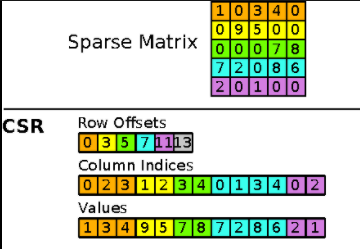


Scipy offers variety of sparse matrices functions that store only non-zero elements. By doing so, memory required for data storage can be minimized. Machine learning process often requires data frame to be in memory. It breaks down the data frame for fitting into RAM. By compressing, data can easily fit in RAM. Performing operations using only non-zero values of the sparse matrix can greatly increase execution speed of the algorithm.

In [23]:
from scipy.sparse import csr_matrix

movie_pivot_csr = csr_matrix(movie_pivot.values)

In [26]:
movie_pivot_csr.shape

(437, 606)

In [54]:
# importing the Nearest neighbour
from sklearn.neighbors import NearestNeighbors

# initiating the NN instance with cosine similarity
model_knn = NearestNeighbors(metric = 'cosine', 
                             algorithm = 'brute' # taking one point and comparing it with other
                            )
# fitting the model with the data
model_knn.fit(movie_pivot_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [55]:
len(movie_pivot)

437

In [59]:
# randomly selecting the movie
query_index = np.random.choice(len(movie_pivot))
print(query_index)

133


In [60]:
movie_pivot.iloc[query_index,:]

userId
1      5.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    2.5
607    0.0
608    3.0
609    3.0
610    4.0
Name: Dumb & Dumber , Length: 606, dtype: float32

In [61]:
# selecting 5 movies similar to the movie selected to recommend  
distances, indices = model_knn.kneighbors(movie_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

In [62]:
# distances of the recommended movie from the searched movie
distances

array([[1.7881393e-07, 3.2980639e-01, 4.2484355e-01, 4.4983202e-01,
        4.5517439e-01]], dtype=float32)

In [63]:
indices

array([[133,   8, 124, 403,  45]], dtype=int64)

In [65]:
# printing the name for that particular movies
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Dumb & Dumber :

1: Ace Ventura: Pet Detective , with distance of 0.329806387424469:
2: Die Hard: With a Vengeance , with distance of 0.42484354972839355:
3: True Lies , with distance of 0.449832022190094:
4: Batman Forever , with distance of 0.45517438650131226:


## SIMILAR USER BASED - USER BASED -(Similar users grouped together)

In [67]:
movie_pivot_user=df_combined.pivot_table(index='userId',columns='title',values='rating').fillna(0)
movie_pivot_user.head()

title,10 Things I Hate About You,12 Angry Men,2001: A Space Odyssey,28 Days Later,300,"40-Year-Old Virgin, The",A.I. Artificial Intelligence,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,...,Wild Wild West,Willy Wonka & the Chocolate Factory,"Wizard of Oz, The","Wolf of Wall Street, The",X-Men,X-Men: The Last Stand,X2: X-Men United,Young Frankenstein,Zombieland,Zoolander
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
movie_pivot_csr_user = csr_matrix(movie_pivot_user.values)

In [69]:
# initiating the model
from sklearn.neighbors import NearestNeighbors

# using cosine similarity parameter to find the distances between sililar users
model_knn = NearestNeighbors(metric = 'cosine', 
                             algorithm = 'brute' # taking one point and comparing it with other
                            )
model_knn.fit(movie_pivot_csr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [70]:
# selecting the user number 226 for examiniaton
query_index_user = np.random.choice(len(movie_pivot))
print(query_index_user)

226


In [71]:
# generating the list of users similar to that of the searched use.
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_pivot_user.index[query_index_user]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_pivot_user.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 229:

1: 9, with distance of 0.329806387424469:
2: 126, with distance of 0.42484354972839355:
3: 406, with distance of 0.449832022190094:
4: 46, with distance of 0.45517438650131226:


In [ ]:
# now we fill find out the movies which user ones have not watched but other users have reviews.